<a href="https://colab.research.google.com/github/rociovald/GEOG5990M_Final/blob/main/Accidents%20Antofagasta%2000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5990M Final Assignment

Student ID number: 201773481

## **Import required packages and libraries**

In [1]:
##  The following packages are installed  #ESTO LO SAQUÉ EL ASSIGNMNET 1
!pip install contextily  # This installs the contextily library.  It is helpful for displaying geographic data on maps.
!pip install geoplot     # This installs the geoplot library. It is useful for working with geospatial data, in maps and data visualisation.
!pip install git+https://github.com/pmdscully/geo_northarrow.git   # This installs the geo_northarrow library which connects to a GitHub repository containing north arrows.
!pip install folium
!pip install h3
!pip install geoplot


  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-02vhl_s3
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-02vhl_s3
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit 963bdd271707a3bcaa47b2d83d92b88ae0b10950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")


## Now the libraries are called up

import pyproj
import contextily as ctx


import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow

from matplotlib import colors  # is used to extract a subset of a colourmap as a new colourmap in matplotlib (in visualisation)

import h3
from shapely.geometry import Point, Polygon
import folium

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

## **Choose data**

In [4]:
## Read in the spatial dataframe

# Read 3 geojson:

gdfs_2019 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2019.geojson')
gdfs_2020 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2020.geojson')
gdfs_2021 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2021.geojson')
gdfs_2022 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2022.geojson')


#gdfs_2019 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/accidents_2019.geojson')
#gdfs_2020 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/accidents_2020.geojson')
#gdfs_2021 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/accidents_2021.geojson')
#gdfs_2022 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/accidents_2022.geojson')



**Information on geojson**

gdfs_2019: Corresponde a los accidentes de transito durante 2019 registrados en la region de Antofagasta, Chile <a href="#ref1">[1]</a>

Source: Comision Nacional de Seguridad de Transito. 2021. Siniestros de tránsito, región de Antofagasta, Chile, 2019. [Online]. [Accessed 5 May 2025]. Available from: https://mapas-conaset.opendata.arcgis.com/datasets/50c493754b5d434c8a1c44b96a6e6e44_0/explore?location=-23.708570%2C-69.342709%2C7.95

gdfs_2020: Corresponde a los accidentes de transito durante 2020 registrados en la region de Antofagasta, Chile <a href="#ref1">[2]</a>

Source: Comision Nacional de Seguridad de Transito. 2024. 2020 - Antofagasta - Siniestros Individuales. [Online]. [Accessed 5 May 2025]. Available from:    https://mapas-conaset.opendata.arcgis.com/datasets/5169f61c547e4be9acbc8c4a7b778821_0/explore?location=-23.708640%2C-69.339105%2C7.95

gdfs_2021: Corresponde a los accidentes de transito durante 2021 registrados en la region de Antofagasta, Chile <a href="#ref1">[3]</a>

Source: Comision Nacional de Seguridad de Transito. 2024. 2021 - Antofagasta - Siniestros Individuales. [Online]. [Accessed 5 May 2025]. Available from:   https://mapas-conaset.opendata.arcgis.com/datasets/66fa006d1ea04129965d500b82247352_0/explore?location=-23.397157%2C-69.345849%2C7.76

gdfs_2022: Corresponde a los accidentes de transito durante 2022 registrados en la region de Antofagasta, Chile <a href="#ref1">[4]</a>

Source: Comision Nacional de Seguridad de Transito. 2024. 2022- Antofagasta - Siniestros Individuales. [Online]. [Accessed 5 May 2025]. Available from: https://mapas-conaset.opendata.arcgis.com/datasets/5ce75f6238ac4d89ad4a00969a0fbaaf_0/about


# **Data-preprocessing and data exploration**

Lo primero que se debe hacer es explorar el contenido de la tabla de atributos en cada uno de los geojson, para de este modo conocer los datos que tenemos.

**Accidentes de transito ano 2019**

In [5]:
gdfs_2019.sample(2)

FID   Ano  Idaccident  Codregion              Region       Comuna  \
1132  1133  2019     1184658          2  REGION ANTOFAGASTA  ANTOFAGASTA   
1779  1780  2019     1235573          2  REGION ANTOFAGASTA  ANTOFAGASTA   

        Zona                 Calle1         Calle2 Numero  ...  Estado_Cal  \
1132  URBANA  EDMUNDO PEREZ ZUJOVIC  LOS TAMARUGOS   NULL  ...       BUENO   
1779  URBANA               EL ROBLE                  6850  ...       BUENO   

      Cód_Condi  Condición Cód_Est_1  Estado_Atm  Fallecidos Graves  \
1132          1       SECO         1   DESPEJADO           0      0   
1779          1       SECO         1   DESPEJADO           0      0   

      Menos_Grav Leves                     geometry  
1132           0     1  POINT (-70.39327 -23.58417)  
1779           0     0  POINT (-70.38216 -23.60926)  

[2 rows x 44 columns]

In [6]:
gdfs_2019.info()  # ‘.info()’ is used to observe if there is null data in any variable,  by looking at the ‘Non-Null Count’ column.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   FID         2494 non-null   int32              
 1   Ano         2494 non-null   int32              
 2   Idaccident  2494 non-null   int32              
 3   Codregion   2494 non-null   int32              
 4   Region      2494 non-null   object             
 5   Comuna      2494 non-null   object             
 6   Zona        2494 non-null   object             
 7   Calle1      2494 non-null   object             
 8   Calle2      2494 non-null   object             
 9   Numero      2494 non-null   object             
 10  lat         2494 non-null   float64            
 11  lng         2494 non-null   float64            
 12  Claseaccid  2494 non-null   int32              
 13  Fecha       2494 non-null   datetime64[ms, UTC]
 14  Cód_Comun   2494 non-null   int3

In [7]:
# Se visualizan el nombre de todas las columnas, ya que en el codigo anetrior solo se puede ser una parte
gdfs_2019.columns

Index(['FID', 'Ano', 'Idaccident', 'Codregion', 'Region', 'Comuna', 'Zona',
       'Calle1', 'Calle2', 'Numero', 'lat', 'lng', 'Claseaccid', 'Fecha',
       'Cód_Comun', 'Cód_Tipo_', 'Tipo_Accid', 'Cód_Tipo1', 'Tipo__CONA',
       'Cód_Zona', 'Zona_1', 'Cód_Ubica', 'Ubicación', 'Cód_Causa',
       'Causa__CON', 'Cód_Cau_1', 'Causa', 'Pistas_de_', 'Pistas_de1',
       'Cód_Calza', 'Calzada', 'Cód__Tipo', 'Tipo_Calza', 'Cód_Estad',
       'Estado_Cal', 'Cód_Condi', 'Condición', 'Cód_Est_1', 'Estado_Atm',
       'Fallecidos', 'Graves', 'Menos_Grav', 'Leves', 'geometry'],
      dtype='object')

**Co-pilot - description of variables**

La CONASET no dispone de una descripcion de los metadatos para cada uno de los geojson sobre accidentes de transito (anos 2019 al 2022). Razon por lo cual fue necesario realizar una consulta a Copilot para luego verificar si coherencia al mirar el contenido de cada columna de la tabla de atributos. El prompt fue el siguiente: ' Define cada una de las columnas que se encuentran en el csv que te adjunto, en no mas de 20 palabras'.

*Accidentes de transito del 2019*


*   'FID': A unique ID for each accident
*   'Ano': Year the accident occurred
*   'Idaccident': Unique identifier of the accident
*   'Codregion': Code of the region where the accident occurred
*   'Region': Name of the region where the accident occurred
*   'Comuna': Name of the commune where the accident occurred
*   'Zona': Type of zone (urban or rural) where the accident occurred
*   'Calle1': Name of the first street involved in the accident
*   'Calle2': Name of the second street involved in the accident (if applicable).
*   'Numero': Nearest address number to the accident location
*   'lat': Latitude of the accident location
*   'lng': Longitude of the accident location
*   'Claseaccid': Class of the accident (collision, run-over, etc.)
*   'Fecha': Date and time the accident occurred
*   'Cód_Comun': Code of the commune where the accident occurred
*   'Cód_Tipo_': Code of the type of accident
*   'Tipo_Accid': Description of the type of accident
*   'Cód_Tipo1': Secondary code of the type of accident
*   'Tipo__CONA': Secondary description of the type of accident
*   'Cód_Zona': Code of the zone where the accident occurred
*   'Zona_1': Description of the zone (urban or rural)
*   'Cód_Ubica': Code of the specific location of the accident
*   'Ubicación': Description of the specific location of the accident
*   'Cód_Causa': Code of the main cause of the accident
*   'Causa__CON': Description of the main cause of the accident
*   'Cód_Cau_1': Secondary code of the cause of the accident
*   'Causa': Secondary description of the cause of the accident
*   'Pistas_de_': Number of traffic lanes on the road
*   'Pistas_de1': Secondary number of traffic lanes on the road
*   'Cód_Calza': Code of the type of pavement (asphalt, concrete, etc.)
*   'Calzada': Description of the type of pavement (asphalt, concrete, etc.)
*   'Cód__Tipo': Code of the pavement condition (good, fair, etc.)
*   'Tipo_Calza': Description of the pavement condition (good, fair, etc.)
*   'Cód_Estad': Code of the atmospheric conditions at the time of the accident
*   'Estado_Cal': Description of the atmospheric conditions at the time of the accident
*   'Cód_Condi': Code of the weather conditions at the time of the accident
*   'Condición': Description of the weather conditions at the time of the accident
*   'Cód_Est_1': Code of the atmospheric state at the time of the accident
*   'Estado_Atm': Description of the atmospheric state at the time of the accident.
*   'Fallecidos': Number of fatalities in the accident
*   'Graves': Number of people with serious injuries in the accident
*   'Menos_Grav': Number of people with less serious injuries in the accident
*   'Leves': Number of people with minor injuries in the accident
*   'geometry': List the type of geometry, in this case POINT

**Accidentes de transito ano 2020**

In [8]:
gdfs_2020.sample(2)

FID  COD_REG              REGION   CUT       COMUNA  CALLE_UNO  \
1816  1817        2  REGION ANTOFAGASTA  2201       CALAMA  FRANKFURT   
1593  1594        2  REGION ANTOFAGASTA  2101  ANTOFAGASTA    ANGAMOS   

              CALLE_DOS  NUMERO  \
1816  ALONSO DE ERCILLA       0   
1593     ANTONIO POUPIN       0   

                                             DIR_GEOCOD        LAT  ...  \
1816  Alonso de Ercilla 3606-3648, Calama, Antofagas... -22.451345  ...   
1593  Avenida Angamos & Antonio Poupin, Antofagasta,... -23.661547  ...   

      Tipo_Accid  Tipo__CONA    Zona                 Causa__CON  \
1816    COLISION    COLISION  URBANA  IMPRUDENCIA DEL CONDUCTOR   
1593    COLISION    COLISION  URBANA  IMPRUDENCIA DEL CONDUCTOR   

                                                  Causa Fallecidos Graves  \
1816  CONDUCCION NO ATENTO CONDICIONES TRANSITO MOMENTO          0      0   
1593  CONDUCCION NO ATENTO CONDICIONES TRANSITO MOMENTO          0      0   

     Menos_Grav Leves                     geometry  
1816          0     3  POINT (-68.94802 -22.45135)  
1593          0     1   POINT (-70.4014 -23.66155)  

[2 rows x 26 columns]

In [9]:
gdfs_2020.info()  # ‘.info()’ is used to observe if there is null data in any variable,  by looking at the ‘Non-Null Count’ column.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   FID         1951 non-null   int32              
 1   COD_REG     1951 non-null   int32              
 2   REGION      1951 non-null   object             
 3   CUT         1951 non-null   int32              
 4   COMUNA      1951 non-null   object             
 5   CALLE_UNO   1951 non-null   object             
 6   CALLE_DOS   1951 non-null   object             
 7   NUMERO      1951 non-null   int32              
 8   DIR_GEOCOD  1951 non-null   object             
 9   LAT         1951 non-null   float64            
 10  LNG         1951 non-null   float64            
 11  VAL_COM     1951 non-null   int32              
 12  TIPO        1951 non-null   object             
 13  Año         1951 non-null   int32              
 14  Idaccident  1951 non-null   int3

In [10]:
# Se visualizan el nombre de todas las columnas, ya que en el codigo anetrior solo se puede ser una parte
gdfs_2020.columns

Index(['FID', 'COD_REG', 'REGION', 'CUT', 'COMUNA', 'CALLE_UNO', 'CALLE_DOS',
       'NUMERO', 'DIR_GEOCOD', 'LAT', 'LNG', 'VAL_COM', 'TIPO', 'Año',
       'Idaccident', 'Fecha', 'Tipo_Accid', 'Tipo__CONA', 'Zona', 'Causa__CON',
       'Causa', 'Fallecidos', 'Graves', 'Menos_Grav', 'Leves', 'geometry'],
      dtype='object')

En general los datos son bastantes similares a los del ano 2019, sin embargo tienen un orden diferente.

*Accidentes de transito del 2020*


*   'FID': a unique ID for each accident
*   'COD_REG': Region code
*   'REGION': Name of the region
*   'CUT': Unique territorial code of the commune
*   'COMUNA': Name of the commune
*   'CALLE_UNO': Name of the first street involved in the accident
*   'CALLE_DOS': Name of the second street involved in the accident
*   'NUMERO': Address number of the accident location
*   'DIR_GEOCOD': Geocoded address of the accident location
*   'LAT': Latitude of the accident location
*   'LNG': Longitude of the accident location
*   'VAL_COM': Value of the commune
*   'TIPO': Type of coordinate (approximate, geometric center, etc.)
*   'Año': Year the accident occurred
*   'Idaccident': Unique identifier of the accident
*   'Fecha': Date and time of the accident
*   'Tipo_Accid': Type of accident (collision, run-over, etc.)
*   'Tipo__CONA': Type of collision according to the analysis (frontal, lateral, etc.)
*   'Zona': Zone where the accident occurred (urban, rural)
*   'Causa__CON': Cause of the collision according to the analysis
*   'Causa': Cause of the accident (recklessness, alcohol, etc.)
*   'Fallecidos': Number of fatalities in the accident
*   'Graves': Number of seriously injured people in the accident
*   'Menos_Grav': Number of less seriously injured people in the accident
*   'Leves': Number of minor injuries in the accident
*   'geometry': List the type of geometry, in this case POINT

**Accidentes de transito ano 2021**

In [11]:
gdfs_2021.sample(2)

FID  FID_1  LABELID    POINT_X    POINT_Y  FID_2   COMUNAREAL  VAL_COM  \
864    865   1763  1346060 -70.381316 -23.630826    229  ANTOFAGASTA        1   
1505  1506   4414  1335838 -68.919681 -22.454127    111       CALAMA        1   

      OBJECTID   A_O  ...  Cód_Condi Condición  Cód_Est_1 Estado_Atm  \
864      15060  2021  ...          1      SECO          1  DESPEJADO   
1505      8652  2021  ...          1      SECO          1  DESPEJADO   

     Fallecidos Graves  Menos_Grav Leves Ilesos                     geometry  
864           0      0           0     1      1  POINT (-70.38132 -23.63083)  
1505          0      0           0     0      1  POINT (-68.91968 -22.45413)  

[2 rows x 70 columns]

In [12]:
gdfs_2021.info()  # ‘.info()’ is used to observe if there is null data in any variable,  by looking at the ‘Non-Null Count’ column.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 70 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   FID         2416 non-null   int32              
 1   FID_1       2416 non-null   int32              
 2   LABELID     2416 non-null   int32              
 3   POINT_X     2416 non-null   float64            
 4   POINT_Y     2416 non-null   float64            
 5   FID_2       2416 non-null   int32              
 6   COMUNAREAL  2416 non-null   object             
 7   VAL_COM     2416 non-null   int32              
 8   OBJECTID    2416 non-null   int32              
 9   A_O         2416 non-null   int32              
 10  IDACCIDENT  2416 non-null   int32              
 11  REGION      2416 non-null   object             
 12  COD_COMUN   2416 non-null   int32              
 13  COMUNA      2416 non-null   object             
 14  CALLE_UNO   2416 non-null   obje

In [13]:
# Se visualizan el nombre de todas las columnas, ya que en el codigo anetrior solo se puede ser una parte
gdfs_2021.columns

Index(['FID', 'FID_1', 'LABELID', 'POINT_X', 'POINT_Y', 'FID_2', 'COMUNAREAL',
       'VAL_COM', 'OBJECTID', 'A_O', 'IDACCIDENT', 'REGION', 'COD_COMUN',
       'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS',
       'TIPO', 'OBJECTID_1', 'Año', 'Idaccide_1', 'Claseaccid', 'Fecha',
       'Hora', 'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna_1', 'Cód_Tipo_',
       'Tipo_Accid', 'Cód_Tipo1', 'Tipo__CONA', 'Cód_Zona', 'Zona',
       'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Causa__CON', 'Cód_Cau_1',
       'Causa', 'Cód_Calle', 'Calle_Un_1', 'Cód_Cal_1', 'Calle_Do_1',
       'Intersecci', 'Número', 'Ruta', 'Cód_Ruta', 'Ubicaci_1', 'Km_Vía_Fe',
       'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo',
       'Tipo_Calza', 'Cód_Estad', 'Estado_Cal', 'Cód_Condi', 'Condición',
       'Cód_Est_1', 'Estado_Atm', 'Fallecidos', 'Graves', 'Menos_Grav',
       'Leves', 'Ilesos', 'geometry'],
      dtype='object')

Al igual que los geojson anteriores, los datos son muy similares.

*Accidentes de transito del 2021*


*   'FID': A unique ID for each accident
*   'FID_1': Additional unique identifier of the accident
*   'LABELID': Label identifier of the accident
*   'POINT_X': X point of the accident location
*   'POINT_Y': Y point of the accident location
*   'FID_2':Second unique identifier of the accident
*   'COMUNAREAL': Name of the commune where the accident occurred
*   'VAL_COM': Value of the commune where the accident occurred
*   'OBJECTID': Unique identifier of the object on the map
*   'A_O': Year of the accident
*   'IDACCIDENT': Unique identifier of the accident
*   'REGION': Name of the region where the accident occurred
*   'COD_COMUN': Code of the commune where the accident occurred
*   'COMUNA': Name of the commune where the accident occurred
*   'CALLE_UNO': Name of the first street involved in the accident
*   'CALLE_DOS': Name of the second street involved in the accident
*   'NUMERO': Address number where the accident occurred
*   'DIR_GEOCOD': Geocoded address of the accident
*   'PAIS': Country where the accident occurred
*   'TIPO': Type of accident location
*   'OBJECTID_1': Second unique identifier of the object on the map
*   'Año': Year of the accident
*   'Idaccide_1': Second unique identifier of the accident
*   'Claseaccid': Class of the accident (collision, run-over, etc.)
*   'Fecha': Date of the accident
*   'Hora': Time of the accident
*   'Cód_Regi': Code of the region where the accident occurred
*   'Región': Name of the region where the accident occurred
*   'Cód_Comun': Code of the commune where the accident occurred
*   'Comuna_1': Name of the commune where the accident occurred
*   'Cód_Tipo_': Code of the type of accident (collision, run-over, etc.)
*   'Tipo_Accid': Type of accident (collision, run-over, etc.)
*   'Cód_Tipo1':  Additional code of the type of accident
*   'Tipo__CONA': Detailed description of the type of accident
*   'Cód_Zona': Code of the zone where the accident occurred
*   'Zona': Zone where the accident occurred
*   'Cód_Ubica': Code of the specific location of the accident
*   'Ubicación': Specific location of the accident
*   'Cód_Causa': Code of the cause of the accident
*   'Causa__CON': Detailed description of the cause of the accident
*   'Cód_Cau_1': Additional code of the cause of the accident
*   'Causa': General cause of the accident
*   'Cód_Calle': Code of the first street involved in the accident
*   'Calle_Un_1': Detailed name of the first street involved in the accident
*   'Cód_Cal_1': Additional code of the first street involved in the accident
*   'Calle_Do_1': Detailed name of the second street involved in the accident
*   'Intersecci': Intersection where the accident occurred
*   'Número': Specific number in the address where the accident occurred
*   'Ruta': Route or highway where the accident occurred
*   'Cód_Ruta': Code of the route or highway where the accident occurred
*   'Ubicaci_1': Additional description of the specific location of the accident
*   'Km_Vía_Fe': Specific kilometer on the railway where the accident occurred
*   'Pistas_de_': Number of lanes or tracks involved in the accident
*   'Pistas_de1': Additional description of the lanes or tracks involved in the accident
*   'Cód_Calza': Code of the road or surface involved in the accident
*   'Calzada': Detailed description of the road or surface involved in the accident.
*   'Cód__Tipo': Specific code of the type of road or surface involved in the accident
*   'Tipo_Calza': Specific type of road or surface involved in the accident
*   'Cód_Estad': Specific code of the state or condition of the road in the accident
*   'Estado_Cal': State or condition of the road in the accident
*   'Cód_Condi': Specific code of the atmospheric conditions during the accident
*   'Condición': Atmospheric conditions during the accident
*   'Cód_Est_1': Additional code of the atmospheric state during the accident.
*   'Estado_Atm': Atmospheric state during the accident
*   'Fallecidos': Total number of fatalities in the accident
*   'Graves': Total number of serious injuries in the accident
*   'Menos_Grav': Total number of less serious injuries in the accident
*   'Leves': Total number of minor injuries in the accident
*   'Ilesos': Total number of uninjured people in the accident
*   'geometry': List the type of geometry, in this case POINT

**Accidentes de transito ano 2022**

In [14]:
gdfs_2022.sample(2)

FID    POINT_X    POINT_Y  Idaccident   Año  Claseaccid  \
2317  2318 -68.945663 -22.447424     1500134  2022           1   
1878  1879 -70.398658 -23.646210     1438770  2022           1   

                         Fecha  Cód_Regi              Región  Cód_Comun  ...  \
2317 2022-12-29 00:00:00+00:00         2  REGION ANTOFAGASTA       2201  ...   
1878 2022-04-21 00:00:00+00:00         2  REGION ANTOFAGASTA       2101  ...   

     Cód_Condi  Condición Cód_Est_1  Estado_Atm Fallecidos  Graves Menos_Grav  \
2317         1       SECO         1   DESPEJADO          0       0          0   
1878         1       SECO         1   DESPEJADO          0       0          0   

      Leves Ilesos                     geometry  
2317      0      2  POINT (-68.94566 -22.44742)  
1878      0      2  POINT (-70.39866 -23.64621)  

[2 rows x 50 columns]

In [15]:
gdfs_2022.info()  # ‘.info()’ is used to observe if there is null data in any variable,  by looking at the ‘Non-Null Count’ column.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   FID         2366 non-null   int32              
 1   POINT_X     2366 non-null   float64            
 2   POINT_Y     2366 non-null   float64            
 3   Idaccident  2366 non-null   int32              
 4   Año         2366 non-null   int32              
 5   Claseaccid  2366 non-null   int32              
 6   Fecha       2366 non-null   datetime64[ms, UTC]
 7   Cód_Regi    2366 non-null   int32              
 8   Región      2366 non-null   object             
 9   Cód_Comun   2366 non-null   int32              
 10  Comuna      2366 non-null   object             
 11  Cód_Tipo    2366 non-null   int32              
 12  Tipo_Accid  2366 non-null   object             
 13  Cód_Tip_1   2366 non-null   int32              
 14  Tipo__CONA  2366 non-null   obje

In [16]:
# Se visualizan el nombre de todas las columnas, ya que en el codigo anetrior solo se puede ser una parte
gdfs_2022.columns

Index(['FID', 'POINT_X', 'POINT_Y', 'Idaccident', 'Año', 'Claseaccid', 'Fecha',
       'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna', 'Cód_Tipo', 'Tipo_Accid',
       'Cód_Tip_1', 'Tipo__CONA', 'Cód_Zona', 'Zona', 'Cód_Ubica', 'Ubicación',
       'Cód_Causa', 'Causa', 'Cód_Cau_1', 'Causa__CON', 'Cód_Calle',
       'Calle_Uno', 'Cód_Cal_1', 'Calle_Dos', 'Intersecci', 'Número', 'Ruta',
       'Cód_Ruta', 'Ubicaci_1', 'Pistas_de', 'Pistas_d_1', 'Cód_Calza',
       'Calzada', 'Cód__Tipo', 'Tipo_Calza', 'Cód_Estad', 'Estado_Cal',
       'Cód_Condi', 'Condición', 'Cód_Est_1', 'Estado_Atm', 'Fallecidos',
       'Graves', 'Menos_Grav', 'Leves', 'Ilesos', 'geometry'],
      dtype='object')

Como en los geojson anteriores, los atributos son muy similares, en la mayoria de los casos, no mantienen el mismo nombre en sus columnas para representar lo mismo.

*Accidentes de transito del 2022*


*   'FID': a unique ID for each accident
*   'POINT_X': Longitude of the accident location
*   'POINT_Y': Latitude of the accident location
*   'Idaccident': Unique identifier for the accident
*   'Año': Year when the accident occurred
*   'Claseaccid': Class of the accident
*   'Fecha': Date and time of the accident
*   'Cód_Regi': Code of the region where the accident occurred
*   'Región': Name of the region where the accident occurred
*   'Cód_Comun': Code of the commune where the accident occurred
*   'Comuna': Name of the commune where the accident occurred
*   'Cód_Tipo': Code for the type of accident
*   'Tipo_Accid': Type of accident
*   'Cód_Tip_1': Code for a subtype of accident
*   'Tipo__CONA': Subtype of accident according to CONASET classification
*   'Cód_Zona': Code for the zone where the accident occurred
*   'Zona': Zone where the accident occurred (urban/rural
*   'Cód_Ubica': Code for the specific location within the zone
*   'Ubicación': Specific location within the zone (e.g., intersection)
*   'Cód_Causa': Code for the cause of the accident
*   'Causa': Cause of the accident
*   'Cód_Cau_1': Code for a secondary cause of the accident
*   'Causa__CON': Secondary cause according to CONASET classification
*   'Cód_Calle': Code for the first street involved in the accident
*   'Calle_Uno': Name of the first street involved in the accident
*   'Cód_Cal_1': Code for the second street involved in the accident
*   'Calle_Dos': Name of the second street involved in the accident
*   'Intersecci': Intersection where the accident occurred, if applicable
*   'Número': Street number or route number where the accident occurred
*   'Ruta': Route name or number where the accident occurred
*   'Cód_Ruta': Code for route name or numbe
*   'Ubicaci_1': Additional location informatio
*   'Pistas_de': Number of lanes in one direction
*   'Pistas_d_1': Number of lanes in another direction
*   'Cód_Calza': Code for road surface type
*   'Calzada': Type of road surface (e.g., asphalt)
*   'Cód__Tipo': Code for road type
*   'Tipo_Calza': Type of road (e.g., bidirectional)
*   'Cód_Estad': Code for road condition
*   'Estado_Cal': Condition of road surface (e.g., good)
*   'Cód_Condi': Code for weather condition
*   'Condición': Weather condition at time of accident (e.g., clear)
*   'Cód_Est_1': Code for atmospheric condition
*   'Estado_Atm': Atmospheric condition at time of accident (e.g., clear)
*   'Fallecidos': Number of fatalities in the accident
*   'Graves': Number of people with serious injuries
*   'Menos_Grav': Number of people with less serious injuries
*   'Leves': Number of people with minor injuries
*   'Ilesos': Number of people without injuries
*   'geometry': List the type of geometry, in this case POINT

Como se puede ver en los cuatro geojson de los accidentes de transito, no existe un formato estandar para nombrar a los atributos

*Coordinate Reference Systems (CRS)*

Antes de visualizar las capas, es fundamental asegurarse de que todas utilicen el mismo sistema de coordenadas. Como se observó en todos los geojson, estos están con un EPSG:4326, lo que corresponde a coordenadas geográficas con un datum WGS 1984. Para el área de estudio emplearemos un sistema de coordenadas proyectadas, específicamente WGS 1984 UTM 19S,EPSG:32719, que permite realizar geoprocesamiento utilizando medidas en metros.

In [17]:
gdfs = [gdfs_2019, gdfs_2020, gdfs_2021, gdfs_2022] # se crea una lista para cada año

In [18]:
gdfs_utm = [gdf.to_crs(epsg=32719) for gdf in gdfs] # se usa un ciclo for para realizar el cambio del CRS gdfs_2019_utm, gdfs_2020_utm,

In [19]:
gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm = gdfs_utm # Se redefine gdfs_utm

In [20]:
for gdf in gdfs_utm: print(gdf.crs) # Se imprime el resultado

EPSG:32719
EPSG:32719
EPSG:32719
EPSG:32719


In [21]:
# Using the crs method it is possible to visualise the coordinate reference system that the layer has.
#gdfs_2019.crs

In [22]:
#gdfs_2019_utm = gdfs_2019.to_crs(epsg=32719)
#gdfs_2019_utm.crs # Check that the change has been made

In [23]:
#gdfs_2020.crs

In [24]:
#gdfs_2020_utm = gdfs_2020.to_crs(epsg=32719)
#gdfs_2020_utm.crs # Check that the change has been made

In [25]:
#gdfs_2021.crs

In [26]:
#gdfs_2021_utm = gdfs_2021.to_crs(epsg=32719)
#gdfs_2021_utm.crs # Check that the change has been made

In [27]:
#gdfs_2022.crs

In [28]:
#gdfs_2022_utm = gdfs_2022.to_crs(epsg=32719)
#gdfs_2022_utm.crs # Check that the change has been made

In [29]:
# check the row and column of dataframe
gdfs_2019_utm.shape

(2494, 44)

In [30]:
# check the row and column of dataframe
gdfs_2020_utm.shape

(1951, 26)

In [31]:
# check the row and column of dataframe
gdfs_2021_utm.shape

(2416, 70)

In [32]:
# check the row and column of dataframe
gdfs_2022_utm.shape

(2366, 50)

La cantidad de filas y columnas son distintos en todos los años.

In [33]:
# Summary statistics
#gdfs_2019_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

In [34]:
# Summary statistics
#gdfs_2020_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

In [35]:
# Summary statistics
#gdfs_2021_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

In [36]:
# Summary statistics
#gdfs_2022_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

## **Data cleaning**

## Se verifican las columnas en comun

* Como se observó al cargar los datos, los DataFrame tienen diferentes columnas.

In [37]:
gdfs = [gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm] # creo una lista llamada gdfs que contiene los accidentes de transito de los cuatro años en estudio.

In [38]:
gdf_columns = [gdf.columns for gdf in gdfs] # se crea una lista llamada gdf_columns que tiene a todas las columnas de los GeoDataFrame en gdfs.
gdf_columns_intersection = set.intersection(*map(set, gdf_columns)) # se convierte a cada lista de columnas en un conjunto para despues usar 'set.intersection' para encontrar las columnas comunes.

In [39]:
# Se identifican las columnas comunes entre todos los dataframe
gdf_columns_intersection

{'Causa',
 'Causa__CON',
 'FID',
 'Fallecidos',
 'Fecha',
 'Graves',
 'Leves',
 'Menos_Grav',
 'Tipo_Accid',
 'Tipo__CONA',
 'Zona',
 'geometry'}

In [40]:
# Se identifican las columnas diferentes entre los dataframe
for cols in gdf_columns:
  print([col for col in cols if col not in gdf_columns_intersection]) # imprime las columnas que no están en la intersección de columnas

['Ano', 'Idaccident', 'Codregion', 'Region', 'Comuna', 'Calle1', 'Calle2', 'Numero', 'lat', 'lng', 'Claseaccid', 'Cód_Comun', 'Cód_Tipo_', 'Cód_Tipo1', 'Cód_Zona', 'Zona_1', 'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Cód_Cau_1', 'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo', 'Tipo_Calza', 'Cód_Estad', 'Estado_Cal', 'Cód_Condi', 'Condición', 'Cód_Est_1', 'Estado_Atm']
['COD_REG', 'REGION', 'CUT', 'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'LAT', 'LNG', 'VAL_COM', 'TIPO', 'Año', 'Idaccident']
['FID_1', 'LABELID', 'POINT_X', 'POINT_Y', 'FID_2', 'COMUNAREAL', 'VAL_COM', 'OBJECTID', 'A_O', 'IDACCIDENT', 'REGION', 'COD_COMUN', 'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS', 'TIPO', 'OBJECTID_1', 'Año', 'Idaccide_1', 'Claseaccid', 'Hora', 'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna_1', 'Cód_Tipo_', 'Cód_Tipo1', 'Cód_Zona', 'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Cód_Cau_1', 'Cód_Calle', 'Calle_Un_1', 'Cód_Cal_1', 'Calle_Do_1', 'Intersecci', '

In [41]:
# Se observan todos los nombres de las columnas que no son iguales entre los gdfs, y se renombran las columnas que se van a utilizar:
renames = {
  'Ano': 'Year',
  'Año': 'Year',
  'Region': 'Region',
  'REGION': 'Region',
  'Región': 'Region',
  'COMUNA': 'Commune',
  'Comuna': 'Commune',
  'Fallecidos': 'Fatalities',
  'Graves':'Serious',
  'Menos_Grav': 'Less serious',
  'Menos_grav': 'Less serious',
  'Leves': 'Slight',
  'Tipo__CONA': 'Type',
  'Causa__CON': 'Cause',
  'Fecha': 'Date'
  }

In [42]:
# Se seleccionan solo algunas columnas
select = ['Year', 'Region', 'Commune', 'Date', 'Type', 'Cause', 'Fatalities', 'Serious', 'Less serious', 'Slight', 'geometry']

In [43]:
gdfs = [gdf.rename(columns=renames)[select] for gdf in gdfs] # Se crea una lista de gdfs con las columnas ya renombradas y seleccionadas.
gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm =gdfs # Se asigna cada gdfs en la lista a una variable especifica, que corresponde a cada ano.

In [44]:
gdfs_2019_utm.sample(3) # Se revisa si el código anterior se ejecutó correctamente

Year              Region      Commune                      Date  \
760   2019  REGION ANTOFAGASTA       CALAMA 2019-01-17 00:00:00+00:00   
1354  2019  REGION ANTOFAGASTA  ANTOFAGASTA 2019-12-20 00:00:00+00:00   
1520  2019  REGION ANTOFAGASTA  ANTOFAGASTA 2019-11-26 00:00:00+00:00   

          Type                      Cause  Fatalities  Serious  Less serious  \
760   COLISION  IMPRUDENCIA DEL CONDUCTOR           0        0             0   
1354  COLISION  IMPRUDENCIA DEL CONDUCTOR           0        0             0   
1520  COLISION               OTRAS CAUSAS           0        0             0   

      Slight                        geometry  
760        0  POINT (507134.288 7515939.709)  
1354       0  POINT (359006.608 7387720.628)  
1520       1  POINT (359450.232 7389760.428)

## Concatenación

Ya hemos visualizado el contenido de los datos por separado, es decir por cada ano. Ahora vamos a unir los cuatro geojson en uno solo para poder visualizar la cantidad total de fallecidos, graves, menos graves y leves para cada año en una misma tabla.

Sin embargo existen columnas duplicadas en uno de los DataFrames, lo que puede haber ocurrido al moemnto de renombrarlas.

In [45]:
# Se visualizan (en orden, comenzando desde el 2019 al 2022) cada uno de los DatFrame y se observa que el
# del año 2021 (el tercero) tiene la columna 'Region' repetida.
for gdf in gdfs: # Se crea un bucle for para iterar cada elemento de la lista gdfs
    print(gdf.columns)  # Se muestra el nombre de la columna

Index(['Year', 'Region', 'Commune', 'Date', 'Type', 'Cause', 'Fatalities',
       'Serious', 'Less serious', 'Slight', 'geometry'],
      dtype='object')
Index(['Year', 'Region', 'Commune', 'Date', 'Type', 'Cause', 'Fatalities',
       'Serious', 'Less serious', 'Slight', 'geometry'],
      dtype='object')
Index(['Year', 'Region', 'Region', 'Commune', 'Date', 'Type', 'Cause',
       'Fatalities', 'Serious', 'Less serious', 'Slight', 'geometry'],
      dtype='object')
Index(['Year', 'Region', 'Commune', 'Date', 'Type', 'Cause', 'Fatalities',
       'Serious', 'Less serious', 'Slight', 'geometry'],
      dtype='object')


Se identifica que habían columnas duplicadas en uno de los DataFrames (gdfs_2021), lo que es necesario corregir antes de concatenar todos los DataFrame en uno solo, sino arroja error.

In [46]:
# Se eliminan las columnas duplicadas. Se obtuvo de Stack Overflow: https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
gdfs_2021_utm = gdfs_2021_utm.loc[:,~gdfs_2021_utm.columns.duplicated()].copy() # Con '.loc' se selecciona las columnas que no estan duplicadas.

In [47]:
# Se revisa y ya no aparece la columna duplicada
gdfs_2021_utm.sample()

Year              Region      Commune                      Date    Type  \
744  2021  REGION ANTOFAGASTA  ANTOFAGASTA 2021-06-13 00:00:00+00:00  CHOQUE   

                         Cause  Fatalities  Serious  Less serious  Slight  \
744  IMPRUDENCIA DEL CONDUCTOR           0        0             0       0   

                           geometry  
744  POINT (356854.837 7382010.507)

In [48]:
# Subsanando el error, ya no hay problemas con concatenar
# By fixing the error there are no problems with concatenating
gdfs_all = pd.concat([gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm], ignore_index=True)

In [49]:
# Se revisa que se hayan integrado los datos de cada año
gdfs_all.sample(5)

Year              Region      Commune                      Date  \
99    2019  REGION ANTOFAGASTA  ANTOFAGASTA 2019-01-18 00:00:00+00:00   
8690  2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-04-15 00:00:00+00:00   
8369  2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-10-24 00:00:00+00:00   
8353  2022  REGION ANTOFAGASTA       CALAMA 2022-10-21 00:00:00+00:00   
1188  2019  REGION ANTOFAGASTA  ANTOFAGASTA 2019-08-06 00:00:00+00:00   

           Type                         Cause  Fatalities  Serious  \
99       CHOQUE     IMPRUDENCIA DEL CONDUCTOR           0        0   
8690   COLISION                  OTRAS CAUSAS           0        1   
8369  OTRO TIPO           DEFICIENCIAS VIALES           0        0   
8353   COLISION  DESOBEDIENCIA A SEÑALIZACION           0        0   
1188   COLISION     IMPRUDENCIA DEL CONDUCTOR           0        1   

      Less serious  Slight                        geometry  
99               0       0  POINT (357311.895 7383895.851)  
8690             0       0  POINT (357478.667 7383884.627)  
8369             0       0   POINT (357767.75 7382382.758)  
8353             0       1  POINT (507115.122 7518598.378)  
1188             0       2  POINT (357337.818 7393101.818)

Lo siguiente es colocar correctamente el nombre de las comunas del gdfs_all

In [50]:
#Identificar las comunas
communes = np.sort(gdfs_all['Commune'].unique()) # Con 'np.sort' se ordenan las communes alfabeticamente, con .unique() se eliminan los duplicados, obteniendo la lista de las comunas.
communes

array(['ANTOFAGASTA', 'CALAMA', 'MARIA ELENA', 'MEJILLONES',
       'SAN PEDRO AT', 'SAN PEDRO ATACAMA', 'SIERRA GORDA', 'TALTAL',
       'TOCOPILLA'], dtype=object)

Se observa que todos aparecen con mayuscula, por lo que se decide dejar con mayuscula solo la primera letra. Además uno de los nombres aparece cortado y repetido ('SAN PEDRO AT' y 'SAN PEDRO ATACAMA')

In [51]:
# Se cambia de el nombre de las comunasv(de mayuscula a minuscula)
gdfs_all.replace({'ANTOFAGASTA': 'Antofagasta',
                  'CALAMA': 'Calama',
                  'MARIA ELENA': 'Maria Elena',
                  'MEJILLONES': 'Mejillones',
                  'SAN PEDRO AT': 'San Pedro Atacama',
                  'SAN PEDRO ATACAMA': 'San Pedro Atacama',
                  'SIERRA GORDA': 'Sierra Gorda',
                  'TALTAL':'Taltal',
                  'TOCOPILLA':'Tocopilla'}, inplace=True)

In [52]:
group = gdfs_all.groupby(['Commune', 'Year'])[['Fatalities',
                                               'Serious',
                                               'Less serious',
                                               'Slight']].sum().unstack()  # Los datos se agrupan por 'Commune' y luego por 'year'. Se seleccionan las columnas Fatalities', 'Serious', 'Less serious', 'Slight'
                                                                           # Luego se suman usando '.sum'
                                                                           # con '.unstack()' convierte a 'Year' en columnas, ya que se trata del indice de nivel mas bajo.


In [53]:
group

Fatalities                   Serious                    \
Year                    2019  2020  2021  2022    2019  2020  2021  2022   
Commune                                                                    
Antofagasta             14.0  11.0  15.0  13.0   107.0  78.0  99.0  96.0   
Calama                   2.0   7.0   5.0  12.0    44.0  55.0  50.0  59.0   
Maria Elena              NaN   NaN   NaN   1.0     NaN   NaN   NaN   0.0   
Mejillones               0.0   1.0   0.0   0.0     1.0   0.0   0.0   1.0   
San Pedro Atacama        0.0   0.0   0.0   0.0     1.0   1.0   0.0   0.0   
Sierra Gorda             NaN   0.0   0.0   NaN     NaN   0.0   0.0   NaN   
Taltal                   0.0   0.0   0.0   1.0     1.0   2.0   1.0   2.0   
Tocopilla                0.0   0.0   0.0   1.0     3.0   6.0   6.0   6.0   

                  Less serious                   Slight                       
Year                      2019  2020  2021  2022   2019   2020   2021   2022  
Commune                                                                       
Antofagasta               40.0  47.0  55.0  41.0  706.0  604.0  688.0  516.0  
Calama                    38.0  41.0  28.0  25.0  375.0  283.0  337.0  350.0  
Maria Elena                NaN   NaN   NaN   3.0    NaN    NaN    NaN    2.0  
Mejillones                 0.0   1.0   0.0   0.0    5.0    5.0    2.0    0.0  
San Pedro Atacama          1.0   0.0   0.0   0.0    3.0    4.0    0.0    4.0  
Sierra Gorda               NaN   0.0   0.0   NaN    NaN    0.0    2.0    NaN  
Taltal                     0.0   1.0   0.0   2.0   14.0   15.0    5.0    4.0  
Tocopilla                  3.0   2.0   1.0   4.0   33.0   42.0   55.0   37.0

In [54]:
df_total = gdfs_all.groupby('Commune')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

In [55]:
df_total.rename(columns={'level_0': 'Type',
                         0: 'Accidents'}, inplace=True)

In [56]:
df_total.sample() # para ver si funciona, si se agregó 'Accidents' correctamente

Type Commune  Accidents
1  Fatalities  Calama         26

In [57]:
df_total.rename(columns={'level_0': 'Type',
                         0: 'Cantidad'}, inplace=True)


In [58]:
df_total.sample()

Type    Commune  Accidents
31  Slight  Tocopilla        167

Text(0.5, 1.0, 'Accidents by commune')

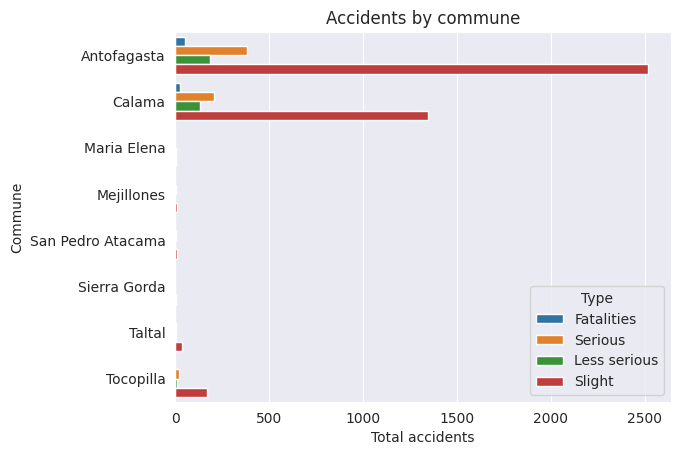

In [59]:
sns.barplot(df_total, x='Accidents', y='Commune', hue='Type')
plt.xlabel('Total accidents')
plt.ylabel('Commune')
plt.title('Accidents by commune')

En el grafico anterior se peude observar que las comunas que concentran una mayor cantidad de accidentes de tránsito son Antofagasta (capital regional) y Calama, en ambas dominan los accidentes slight (más de 2500 en Antofagasta y más de 1300 en Calama) seguido por los de tipo serious (alredeor de 400 y 200 respectivamente). Por esta razón que se observará con un poco más de detalle como se componen los accidentes en estas dos comunas.





## Antofagasta

In [60]:
gdf_anto = gdfs_all[gdfs_all['Commune']== 'Antofagasta']

In [61]:
df_total_anto = gdf_anto.groupby('Year')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

In [62]:
df_total_anto.rename(columns={'level_0': 'Type',
                              0: 'Accidents'}, inplace=True)

In [63]:
df_total_anto['Year'] = df_total_anto['Year'].astype(str)

Text(0.5, 1.0, 'Accidents Antofagasta')

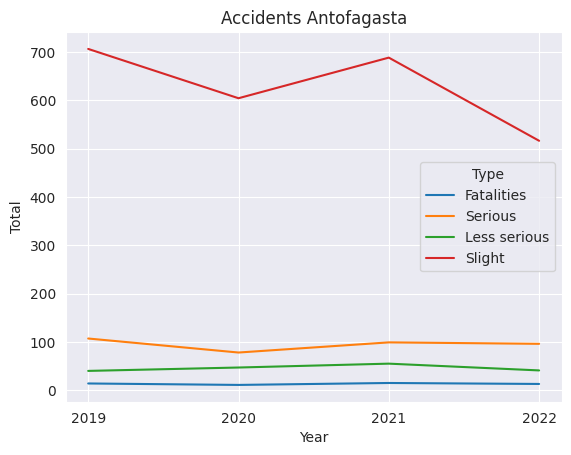

In [64]:
sns.lineplot(df_total_anto, x='Year', y='Accidents', hue='Type')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Accidents Antofagasta')

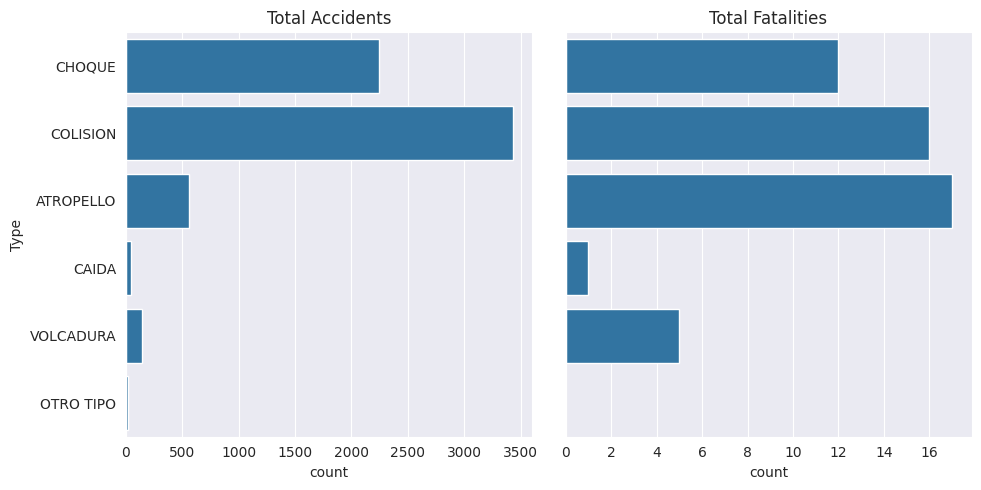

In [66]:
# Fuente: https://stackoverflow.com/questions/25239933/how-to-add-a-title-to-each-subplot

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.countplot(gdf_anto, y='Type', ax=axs[0])
axs[0].title.set_text('Total Accidents')

sns.countplot(gdf_anto[gdf_anto['Fatalities'] > 0], y='Type', ax=axs[1])
axs[1].title.set_text('Total Fatalities')


plt.tight_layout()

In [66]:
#´TYPE´PONERLO CON MINUSCULA Y CON COLORES EL GRAFICO

<Axes: xlabel='count', ylabel='Cause'>

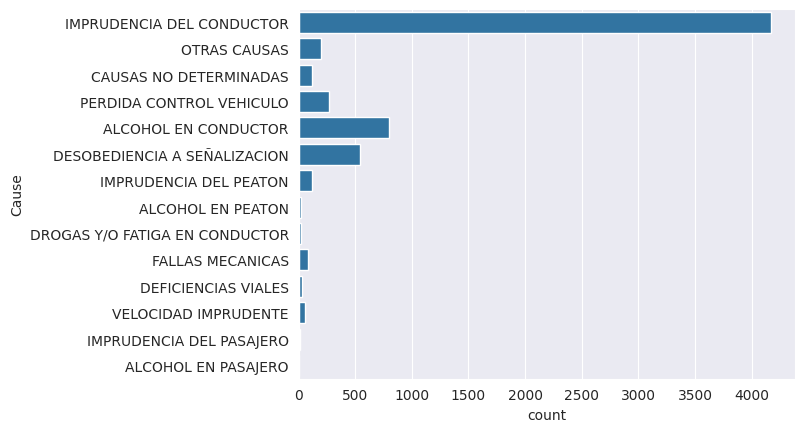

In [125]:
sns.countplot(gdf_anto, y='Cause')

##Exploratory Data Analysis

In [67]:
# Summary statistics
gdfs_2019_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

Year   Fatalities      Serious  Less serious       Slight
count  2494.0  2494.000000  2494.000000   2494.000000  2494.000000
mean   2019.0     0.006415     0.062951      0.032879     0.455493
std       0.0     0.084729     0.255793      0.182798     0.865286
min    2019.0     0.000000     0.000000      0.000000     0.000000
25%    2019.0     0.000000     0.000000      0.000000     0.000000
50%    2019.0     0.000000     0.000000      0.000000     0.000000
75%    2019.0     0.000000     0.000000      0.000000     1.000000
max    2019.0     2.000000     2.000000      2.000000    13.000000

In [68]:
# Summary statistics
gdfs_2020_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

Year   Fatalities      Serious  Less serious       Slight
count  1951.0  1951.000000  1951.000000   1951.000000  1951.000000
mean   2020.0     0.009739     0.072783      0.047155     0.488467
std       0.0     0.103317     0.269534      0.239296     0.825084
min    2020.0     0.000000     0.000000      0.000000     0.000000
25%    2020.0     0.000000     0.000000      0.000000     0.000000
50%    2020.0     0.000000     0.000000      0.000000     0.000000
75%    2020.0     0.000000     0.000000      0.000000     1.000000
max    2020.0     2.000000     2.000000      5.000000     6.000000

In [69]:
# Summary statistics
gdfs_2021_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

Year   Fatalities      Serious  Less serious       Slight
count  2416.0  2416.000000  2416.000000   2416.000000  2416.000000
mean   2021.0     0.008278     0.064570      0.034768     0.450745
std       0.0     0.090626     0.260535      0.194201     0.827113
min    2021.0     0.000000     0.000000      0.000000     0.000000
25%    2021.0     0.000000     0.000000      0.000000     0.000000
50%    2021.0     0.000000     0.000000      0.000000     0.000000
75%    2021.0     0.000000     0.000000      0.000000     1.000000
max    2021.0     1.000000     3.000000      3.000000     8.000000

In [70]:
# Summary statistics
gdfs_2022_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

Year   Fatalities      Serious  Less serious       Slight
count  2366.0  2366.000000  2366.000000   2366.000000  2366.000000
mean   2022.0     0.011834     0.069315      0.031699     0.385883
std       0.0     0.108163     0.291263      0.186911     0.757957
min    2022.0     0.000000     0.000000      0.000000     0.000000
25%    2022.0     0.000000     0.000000      0.000000     0.000000
50%    2022.0     0.000000     0.000000      0.000000     0.000000
75%    2022.0     0.000000     0.000000      0.000000     1.000000
max    2022.0     1.000000     6.000000      2.000000     9.000000

In [71]:
#df_total = gdfs_all.groupby('Commune')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

## Analizando los datos se observa que la comuna de Antofagasta (capital regional) es la que concentra la mayor parte de los accidentes (indicar el nummero) , seguida por Calama (numero) y luego Tocopilla (numero)

In [72]:
#gdfs_all.groupby(['Commune', 'Year'])['Accidents'].sum().unstack().style.background_gradient()  # INDICAR DE DONDE SAQUÉ EL CODIGO

### Desagregando los accidentes por año, en el 2019 la mayoría se concentraron en la comuna de Puente Alto (812), seguido por Maipú (732). En el 2020, la cantidad de accidentes disminuyó a más de la mitad, siendo la comuna de Santiago la que concentró una mayor cantidad (384), en este año evidentemente la disminución se debe al efecto de la pandemia en la movildiad de las personas. En el año 2021, Santiago vuelve a tener el mayor registro de accidentes (497), seguido por Puente Alto (475). Mientras que en el año 2022, Puente Alto concentró la mayor cifra de accidentes (446), seguido por Providencia (318).

#Antofagasta

In [73]:
gdf_anto = gdfs_all[gdfs_all['Commune']== 'Antofagasta']

In [74]:
df_total_anto = gdf_anto.groupby('Year')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

In [75]:
df_total_anto.rename(columns={'level_0': 'Type',
                              0: 'Accidents'}, inplace=True)

In [76]:
df_total_anto['Year'] = df_total_anto['Year'].astype(str)

Text(0.5, 1.0, 'Accidents Antofagasta')

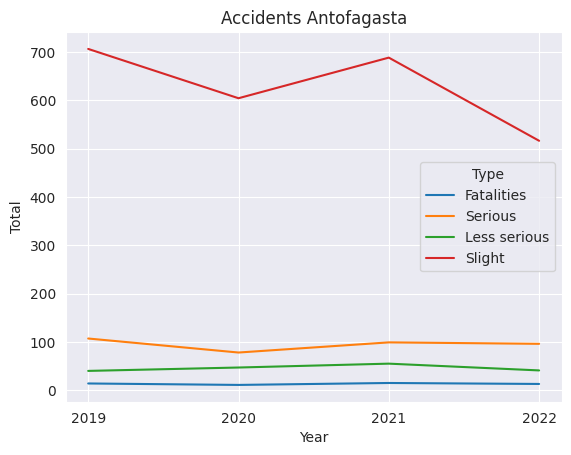

In [77]:
sns.lineplot(df_total_anto, x='Year', y='Accidents', hue='Type')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Accidents Antofagasta')

#Calama

In [78]:
gdf_calama = gdfs_all[gdfs_all['Commune']== 'Calama']

In [79]:
df_total_calama = gdf_calama.groupby('Year')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

In [80]:
df_total_calama.rename(columns={'level_0': 'Type',
                              0: 'Accidents'}, inplace=True)

In [81]:
df_total_calama['Year'] = df_total_calama['Year'].astype(str)

Text(0.5, 1.0, 'Accidents Calama')

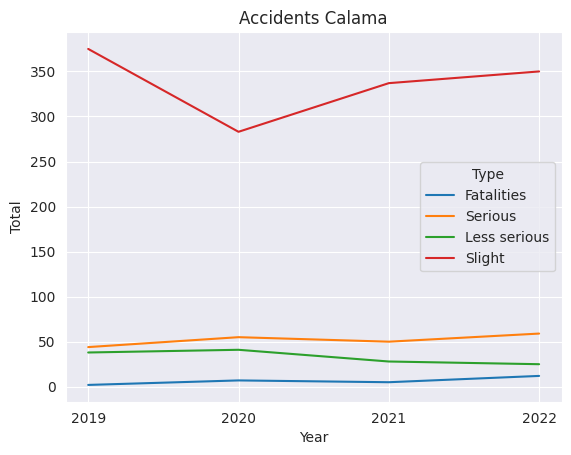

In [82]:
sns.lineplot(df_total_calama, x='Year', y='Accidents', hue='Type')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Accidents Calama')

Health facilities
- Se revisa el geojson con la información de los hospitales del pais.


In [83]:
health_facilities = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/health_facilities_2024.geojson')

In [84]:
health_facilities.crs # Se revisa su sistema de cordenadas proyectadas

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
health_facilities = health_facilities.to_crs(epsg=32719) # Se cambia a UTM 19 sur

In [86]:
health_facilities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4613 entries, 0 to 4612
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         4613 non-null   int32   
 1   COD_ANT     4613 non-null   object  
 2   COD_VIG     4613 non-null   int32   
 3   COD_M_ANT   4613 non-null   object  
 4   COD_M_NUEV  4613 non-null   object  
 5   COD_REG     4613 non-null   int32   
 6   NOM_REG     4613 non-null   object  
 7   COD_DEP     4613 non-null   int32   
 8   DEPENDENC   4613 non-null   object  
 9   PERTENENCI  4613 non-null   object  
 10  TIPO        4613 non-null   object  
 11  AMBITO      4613 non-null   object  
 12  NOMBRE      4613 non-null   object  
 13  CERTIFI     4613 non-null   object  
 14  DEP_ADM     4613 non-null   object  
 15  NIVEL       4613 non-null   object  
 16  COD_COM     4613 non-null   object  
 17  NOM_COM     4613 non-null   object  
 18  VIA         4613 non-null   object  
 19

In [87]:
# Se renombran los nombres de las columnas que se van a seleccionar
renames = {
    'TIPO': 'Type',
    'NOMBRE': 'Name',
    'URGENCIA': 'Urgency',
    'REGION': 'Region',
    'PROVINCIA': 'Province',
    'COMUNA': 'Commune'
}

In [88]:
health_facilities.rename(columns=renames, inplace=True)

In [89]:
# Se verifican los cambios
print(health_facilities.columns)

Index(['FID', 'COD_ANT', 'COD_VIG', 'COD_M_ANT', 'COD_M_NUEV', 'COD_REG',
       'NOM_REG', 'COD_DEP', 'DEPENDENC', 'PERTENENCI', 'Type', 'AMBITO',
       'Name', 'CERTIFI', 'DEP_ADM', 'NIVEL', 'COD_COM', 'NOM_COM', 'VIA',
       'NUMERO', 'DIRECCION', 'FONO', 'F_INICIO', 'Urgency', 'TIPO_URGE',
       'CLAS_SAPU', 'LATITUD', 'LONGITUD', 'PRESTADOR', 'ESTADO', 'COMPLEJIDA',
       'TIPO_ATEN', 'F_INCR', 'CUT_REG', 'CUT_PROV', 'CUT_COM', 'Region',
       'Province', 'Commune', 'geometry'],
      dtype='object')


In [90]:
# Se filtran por la región 'ANTOFAGASTA'
health_facilities_anto=health_facilities[(health_facilities['Region']== 'ANTOFAGASTA') & (health_facilities['Urgency'] == 'SI')]

In [91]:
# Se crea un nuevo DataFrame seleccionando solo las columnas renombradas
select = ['Type', 'Name', 'Urgency', 'Region', 'Province', 'Commune', 'geometry']


In [92]:
gdf_health_anto = health_facilities_anto[select]
gdf_health_anto

Type  \
106                                           HOSPITAL   
107                                            CLINICA   
108                                           HOSPITAL   
111                                            CLINICA   
113                                            CLINICA   
148   SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU)   
149   SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU)   
150   SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU)   
151   SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU)   
152   SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU)   
153   SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU)   
167          CENTRO DE DIAGNOSTICO Y TERAPEUTICO (CDT)   
174  SERVICIO DE ATENCION PRIMARIA DE URGENCIA DE A...   
195                                           HOSPITAL   
201                   SERVICIO DE URGENCIA RURAL (SUR)   
202                   SERVICIO DE URGENCIA RURAL (SUR)   
203                                           HOSPITAL   
205                                           HOSPITAL   
207                                            CLINICA   
208                                           HOSPITAL   
232   SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU)   
233   SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU)   
240  SERVICIO DE ATENCION PRIMARIA DE URGENCIA DE A...   
263                   SERVICIO DE URGENCIA RURAL (SUR)   
264                   SERVICIO DE URGENCIA RURAL (SUR)   
265                                           HOSPITAL   
271                   SERVICIO DE URGENCIA RURAL (SUR)   

                                           Name Urgency       Region  \
106  HOSPITAL DR. LEONARDO GUZMAN (ANTOFAGASTA)      SI  ANTOFAGASTA   
107                         CLINICA ANTOFAGASTA      SI  ANTOFAGASTA   
108                  HOSPITAL MILITAR DEL NORTE      SI  ANTOFAGASTA   
111                          CLINICA LA PORTADA      SI  ANTOFAGASTA   
113              CLINICA CUMBRES DEL NORTE S.A.      SI  ANTOFAGASTA   
148                   SAPU NORTE DE ANTOFAGASTA      SI  ANTOFAGASTA   
149                         SAPU ANTONIO RENDIC      SI  ANTOFAGASTA   
150                              SAPU CORVALLIS      SI  ANTOFAGASTA   
151           SAPU JUAN PABLO II DE ANTOFAGASTA      SI  ANTOFAGASTA   
152         SAPU CENTRAL ORIENTE DE ANTOFAGASTA      SI  ANTOFAGASTA   
153              SAPU CENTRO SUR DE ANTOFAGASTA      SI  ANTOFAGASTA   
167           CENTRO ONCOLOGICO DEL NORTE (CON)      SI  ANTOFAGASTA   
174                                 SAR COVIEFI      SI  ANTOFAGASTA   
195                      HOSPITAL DE MEJILLONES      SI  ANTOFAGASTA   
201                               SUR BAQUEDANO      SI  ANTOFAGASTA   
202                            SUR SIERRA GORDA      SI  ANTOFAGASTA   
203                HOSPITAL 21 DE MAYO (TALTAL)      SI  ANTOFAGASTA   
205      HOSPITAL DR. CARLOS CISTERNAS (CALAMA)      SI  ANTOFAGASTA   
207                  CLINICA ANDES SALUD EL LOA      SI  ANTOFAGASTA   
208         HOSPITAL DEL COBRE SALVADOR ALLENDE      SI  ANTOFAGASTA   
232                            SAPU NORPONIENTE      SI  ANTOFAGASTA   
233                                    SAPU SUR      SI  ANTOFAGASTA   
240                                SAR ALEMANIA      SI  ANTOFAGASTA   
263                       SUR SAN PEDRO ATACAMA      SI  ANTOFAGASTA   
264                                 SUR SOCAIRE      SI  ANTOFAGASTA   
265     HOSPITAL DR. MARCOS MACUADA (TOCOPILLA)      SI  ANTOFAGASTA   
271                             SUR MARIA ELENA      SI  ANTOFAGASTA   

        Province               Commune                        geometry  
106  ANTOFAGASTA           ANTOFAGASTA  POINT (358612.553 7387507.071)  
107  ANTOFAGASTA           ANTOFAGASTA  POINT (356221.096 7378523.727)  
108  ANTOFAGASTA           ANTOFAGASTA   POINT (357072.015 7381946.65)  
111  ANTOFAGASTA           ANTOFAGASTA   POINT (357317.69 7384356.152)  
113  ANTOFAGASTA           ANTOFAGASTA  POI

Primero se visualiza la ubicacion de los  centros de salud que atienden urgencias

In [93]:
# In order to visualise that the content ‘battlefields_utm’ is correct, i.e. that it includes the number of monuments per battlefield, the following dynamic visualisation is generated.
# The following code is based on the geopandas documentation obtained from this website: https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html

gdf_health_anto.explore(column ='Urgency',   # Creates a choropleth map based on the column ‘monuments-count’
                         tooltip= ('Name','Commune'),  # Displays the ‘Name’ and ‘monuments_count’ on mouse-over
                         popup=True,   # Displays a pop-up window with the tooltip display
                         cmap='plasma',  # Uses the plasma colour palette (it is purposely used to represent the smaller values with a darker colour, as most of the polygons concentrate
                                         # less than 3 monuments, so that they can be visualised more easily).
                         wmin=0,  # This parameter starts the legend with zero
                         style_kwds=dict(color='black'))  # with this parameter you define that the colour of the line of each polygon is black.

Spatial Exploration

* Gran parte del codigo (casi completo) fue sacado de Medium: https://medium.com/@jesse.b.nestler/how-to-convert-h3-cell-boundaries-to-shapely-polygons-in-python-f7558add2f63

In [94]:
xmin, ymin, xmax, ymax = [352600, 7372800, 360700, 7400700]
gdf_anto_subset = gdf_anto.cx[xmin:xmax, ymin:ymax].copy()

In [95]:
gdf_anto_subset.explore('Fatalities', cmap='autumn_r')

H3

* Es necesario convertir a coordenadas geograficas para asignar

In [96]:
gdf_anto_subset = gdf_anto_subset.to_crs(epsg=4326)

In [97]:
# x =long, y = lat
res = 9
col = f"H3_{res}"
gdf_anto_subset[col] = gdf_anto_subset.apply(lambda row: str(h3.latlng_to_cell(row.geometry.y, row.geometry.x, res)), axis=1) # aqui originalmente era "h3.geo_to_h3", pero por la version se actualizó a "h3.latlng_to_cell", https://github.com/uber/h3-py/issues/100

In [98]:
gdf_anto_subset.sample(3)

Year              Region      Commune                      Date  \
906   2019  REGION ANTOFAGASTA  Antofagasta 2019-08-09 00:00:00+00:00   
1722  2019  REGION ANTOFAGASTA  Antofagasta 2019-04-24 00:00:00+00:00   
4293  2020  REGION ANTOFAGASTA  Antofagasta 2020-02-29 00:00:00+00:00   

           Type                      Cause  Fatalities  Serious  Less serious  \
906    COLISION  IMPRUDENCIA DEL CONDUCTOR           0        0             0   
1722  ATROPELLO     IMPRUDENCIA DEL PEATON           0        1             0   
4293   COLISION        DEFICIENCIAS VIALES           0        0             0   

      Slight                     geometry             H3_9  
906        0  POINT (-70.37734 -23.62895)  89b22606e9bffff  
1722       0  POINT (-70.38202 -23.61932)  89b22606147ffff  
4293       1   POINT (-70.39399 -23.6531)  89b22604533ffff

In [99]:
h3_df = gdf_anto_subset.groupby(col)[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().reset_index()

In [100]:
h3_df['Total'] = h3_df['Fatalities'] + h3_df['Serious'] + h3_df['Less serious'] + h3_df['Slight']
h3_df

H3_9  Fatalities  Serious  Less serious  Slight  Total
0    89b22604103ffff           0        1             1       4      6
1    89b22604107ffff           0        0             0       0      0
2    89b2260410bffff           0        0             0       3      3
3    89b2260410fffff           1        1             0      15     17
4    89b22604113ffff           0        0             1       1      2
..               ...         ...      ...           ...     ...    ...
352  89b22614e87ffff           0        0             0       1      1
353  89b22614e8bffff           0        0             0       0      0
354  89b22614ec3ffff           0        0             0       1      1
355  89b22614ed3ffff           0        0             0       0      0
356  89b22614ed7ffff           0        0             0       0      0

[357 rows x 6 columns]

Convert to Shapely Polygon

In [101]:
def cell_to_shapely(cell):
    coords = h3.cell_to_boundary(cell) # H3 library’s h3_to_geo_boundary function (renamed cell_to_boundary in v4.0.0)
    flipped = tuple(coord[::-1] for coord in coords)
    return Polygon(flipped)

In [102]:
h3_geoms = h3_df[col].apply(lambda x: cell_to_shapely(x))
h3_gdf = gpd.GeoDataFrame(data=h3_df, geometry=h3_geoms, crs=4326)

In [103]:
h3_gdf.head()

H3_9  Fatalities  Serious  Less serious  Slight  Total  \
0  89b22604103ffff           0        1             1       4      6   
1  89b22604107ffff           0        0             0       0      0   
2  89b2260410bffff           0        0             0       3      3   
3  89b2260410fffff           1        1             0      15     17   
4  89b22604113ffff           0        0             1       1      2   

                                            geometry  
0  POLYGON ((-70.40328 -23.67074, -70.4044 -23.67...  
1  POLYGON ((-70.40041 -23.67238, -70.40154 -23.6...  
2  POLYGON ((-70.4064 -23.67228, -70.40752 -23.67...  
3  POLYGON ((-70.40353 -23.67392, -70.40466 -23.6...  
4  POLYGON ((-70.40302 -23.66757, -70.40415 -23.6...

## Visualization
- Para la visualización, se vuelven a transformar las coordenadas.
- La cartografía busca identificar las zonas con más accidentes, y contrastarlas con los accidentes que registraron muertes.
- Se agrega el gdf_dpa de Antofagasta.


In [104]:
gdf_dpa = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/2.geojson')

In [105]:
gdf_dpa = gdf_dpa.to_crs(epsg=32719)

In [106]:
h3_gdf = h3_gdf.to_crs(epsg=32719)
gdf_anto_subset = gdf_anto_subset.to_crs(epsg=32719)

In [107]:
gdf_anto_subset_fatal = gdf_anto_subset[gdf_anto_subset['Fatalities'] > 0]

In [108]:
gdf_anto_subset_fatal.sample()

Year              Region      Commune                      Date  \
7424  2022  REGION ANTOFAGASTA  Antofagasta 2022-07-29 00:00:00+00:00   

           Type                   Cause  Fatalities  Serious  Less serious  \
7424  VOLCADURA  CAUSAS NO DETERMINADAS           1        0             0   

      Slight                       geometry             H3_9  
7424       0  POINT (356941.61 7383246.736)  89b22604573ffff

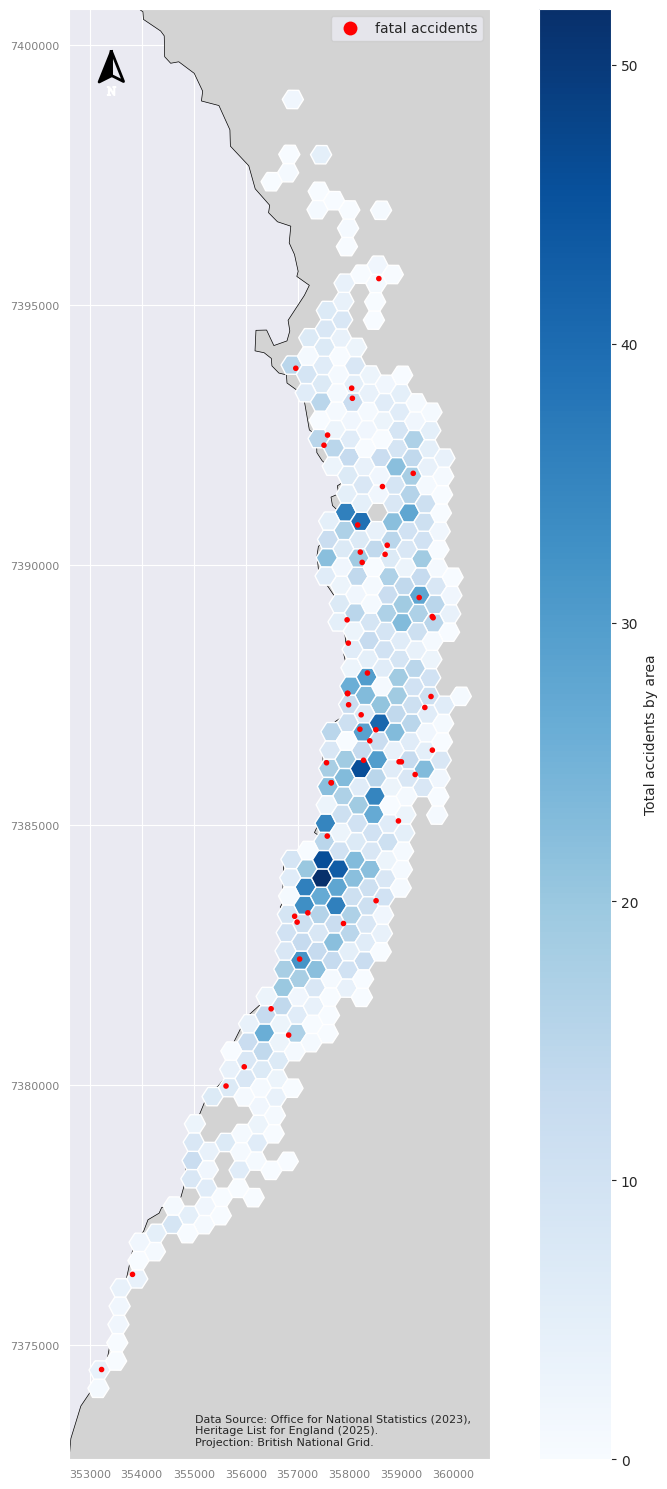

In [109]:
base = gdf_dpa.plot(color='lightgrey', # The fill colour is chosen
                    edgecolor='black', # The colour of the contour line of the regions is chosen
                    linewidth=0.5,
                    figsize=(10, 15))

h3_gdf.plot(ax=base,
            column='Total',
            cmap='Blues',
            legend=True,
            legend_kwds={'label': 'Total accidents by area'})

gdf_anto_subset_fatal.plot('Commune', # Es necesario agregar una columna para mostrar la legenda
                             ax=base,
                             marker='.',
                             cmap='autumn', # Se asigna un cmap, ya que, al ingresar el parámetro color se pierde la legenda
                             legend=True,
                             legend_kwds={'labels': ['fatal accidents']}) # se renombra la legenda

base.tick_params(axis='both',  # specifies that the changes will be applied to both axis
                 which='major',  # indicates that the changes will be applied to the major ticks
                 labelsize=8,  # the font size of the mark labels
                 colors='grey')

base.set_xlim((xmin, xmax))
base.set_ylim((ymin, ymax))

base.ticklabel_format(style='plain') # eliminates scientific coordinate notation

# The following code follows the model of class 6 of this course, in ‘Week_6_Python_as_a_GIS.ipynb’.
# add a North arrow (look at the documentation here: https://github.com/pmdscully/geo_northarrow)
add_north_arrow(ax=base,
                scale=.30, # a value of 0.55 means that the arrow will be reduced to 55% of its original size
                xlim_pos=0.1, # it the horizontal position of the north arrow on the chart
                ylim_pos=.95, # is the vertical position of the north arrow on the chart
                color='#000', # the colour of the arrow is set, #000’ is the hex code for the colour black
                text_scaler=2, # doubles the size of the text (=2)
                text_yT=-1.45) # is the vertical position of the text

# The following line of code was obtained from the following source, modifying the xy parameters for its position: https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6
base.annotate('''
Data Source: Office for National Statistics (2023),
Heritage List for England (2025).
Projection: British National Grid.''',
              xy=(0.3, 0.01),  # The xy parameter is manually modified to adjust its position.
              xycoords='axes fraction', # Is linked to the xy position
              fontsize=8) # The font size is adjusted

plt.tight_layout()




In [110]:
#base = h3_gdf.plot('Total', cmap='Blues', figsize=(10, 15))
#gdf_anto_subset_fatal.plot(ax=base, marker='.', c='r')
#plt.title('Total accidents versus fatalities')

## Misma cartografía anterior mediante `pd.explore`
- Fuente: https://stackoverflow.com/questions/73767559/geopandas-explore-how-to-plot-more-than-one-layer

In [111]:
m = h3_gdf.explore('Total', cmap='Blues', name='Total accidents')
m = gdf_anto_subset_fatal.explore(m=m, name='Fatal accidents', color='red')
folium.LayerControl().add_to(m)
m

In [112]:
# creación de clusters
years = [2019, 2020, 2021, 2022]
gdfs_all = [gdfs_all[gdfs_all['Year'] == y] for y in years]
gdf_2019, gdf_2020, gdf_2021, gdf_2022 = gdfs_all

In [113]:
# Ensure that the indices are unique before concatenating
#for gdf in [gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm]:
    #gdf.reset_index(drop=True, inplace=True)

In [114]:
# Concatenate the GeoDataFrames into a single GeoDataFrame
#gdf_combined = gpd.GeoDataFrame(pd.concat([gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm], ignore_index=True))

# Print the resulting GeoDataFrame
#print(gdf_combined)

In [115]:
# Verificar y renombrar columnas, seleccionar columnas específicas para cada GeoDataFrame
#gdfs_renamed = []
#for gdf in gdfs:
    # Verificar si las columnas a renombrar existen en el GeoDataFrame
    #missing_columns = [col for col in renames.keys() if col not in gdf.columns]
    #if missing_columns:
        #print(f"Columnas faltantes en el GeoDataFrame: {missing_columns}")
    #else:
        #gdf_renamed = gdf.rename(columns=renames)
        # Verificar si las columnas seleccionadas existen después de renombrar
        #missing_select_columns = [col for col in select if col not in gdf_renamed.columns]
        #if missing_select_columns:
            #print(f"Columnas seleccionadas faltantes después de renombrar: {missing_select_columns}")
        #else:
            #gdfs_renamed.append(gdf_renamed[select])


In [116]:
# Asegurarse de que los índices sean únicos antes de concatenar
#for gdf in gdfs_renamed:
    #gdf.reset_index(drop=True, inplace=True)


In [117]:
#gdfs_2022_utm.dtypes

In [118]:
#gdfs_2019_utm.sample()

In [119]:
#gdfs_2019_utm.info()

In [120]:
# Concatenar los GeoDataFrames en un solo GeoDataFrame
#gdf = gpd.GeoDataFrame(pd.concat(gdfs_renamed, ignore_index=True))

## De aquí para abajo es el codigo de la clase 41 del diplomado (quiero replicar este análisis con los datos de Antofagasta)

In [121]:
gdf.sample(12)

Year              Region      Commune                      Date  \
154   2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-05-30 00:00:00+00:00   
1093  2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-02-17 00:00:00+00:00   
308   2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-06-14 00:00:00+00:00   
178   2022  REGION ANTOFAGASTA       CALAMA 2022-06-05 00:00:00+00:00   
1186  2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-02-13 00:00:00+00:00   
1735  2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-04-01 00:00:00+00:00   
347   2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-06-30 00:00:00+00:00   
951   2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-01-26 00:00:00+00:00   
2302  2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-10-19 00:00:00+00:00   
214   2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-06-07 00:00:00+00:00   
1129  2022  REGION ANTOFAGASTA  ANTOFAGASTA 2022-02-24 00:00:00+00:00   
224   2022  REGION ANTOFAGASTA       CALAMA 2022-06-10 00:00:00+00:00   

           Type                         Cause  Fatalities  Serious  \
154    COLISION     IMPRUDENCIA DEL CONDUCTOR           0        0   
1093   COLISION     IMPRUDENCIA DEL CONDUCTOR           0        0   
308   ATROPELLO     IMPRUDENCIA DEL CONDUCTOR           0        0   
178    COLISION          ALCOHOL EN CONDUCTOR           0        0   
1186     CHOQUE          VELOCIDAD IMPRUDENTE           0        0   
1735   COLISION      IMPRUDENCIA DEL PASAJERO           0        0   
347    COLISION  DESOBEDIENCIA A SEÑALIZACION           0        0   
951    COLISION              FALLAS MECANICAS           0        0   
2302   COLISION     IMPRUDENCIA DEL CONDUCTOR           0        0   
214    COLISION     IMPRUDENCIA DEL CONDUCTOR           0        0   
1129     CHOQUE          ALCOHOL EN CONDUCTOR           0        0   
224      CHOQUE     IMPRUDENCIA DEL CONDUCTOR           0        0   

      Less serious  Slight                        geometry  
154              0       0  POINT (357811.691 7393901.972)  
1093             0       0  POINT (357349.351 7384614.037)  
308              1       0  POINT (358358.673 7383266.381)  
178              0       4  POINT (506767.168 7515931.185)  
1186             0       0  POINT (357816.236 7391127.984)  
1735             0       0   POINT (358812.802 7390534.49)  
347              0       0   POINT (357814.313 7385877.77)  
951              0       1  POINT (356961.665 7398911.239)  
2302             0       0  POINT (358400.043 7387328.533)  
214              0       0  POINT (357403.517 7382192.726)  
1129             0       0  POINT (358688.893 7388930.255)  
224              0       0  POINT (506369.509 7516010.488)

In [122]:
#Identificar las comunas
comunas = np.sort(gdf['Comuna'].unique())
comunas

KeyError: 'Comuna'

In [ ]:
# cambio de nombre columnas
df.replace({'PEÃ‘ALOLEN': 'PEÑALOLEN',
             'PENALOLEN': 'PEÑALOLEN',
             'PENAFLOR': 'PEÑAFLOR',
             'QUINTA NORMA': 'QUINTA NORMAL',
             'Ã‘UÃ‘OA': 'ÑUÑOA'}, inplace=True)

In [ ]:
# Calcular accidentes por año
accidentes_por_año = gdf.groupby('Año')['Accidentes'].sum().reset_index()

# Gráfico con la cantidad de accidentes en los años 2019, 2020, 2021 y 2022
plt.figure(figsize=(10, 5))  # Ajustar el tamaño del gráfico si es necesario
sns.lineplot(x='Año', y='Accidentes', data=accidentes_por_año, marker='o')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.title('Accidentes por Año')
plt.show()

In [ ]:
gdf.groupby('Año')[['Fallecidos', 'Graves', 'Menos_Grav', 'Leves']].sum()

In [ ]:
acc_comunas = gdf.groupby('Comuna')['Accidentes'].sum()
acc_comunas

In [ ]:
# se crea un gráfico con las comunas y la cantidad de accidentes
plt.figure(figsize=(20, 10))
sns.barplot(x=acc_comunas.sort_values().values, y=acc_comunas.sort_values().index, orient='h')
plt.xlabel('Número de Accidentes')
plt.ylabel('Comuna')
plt.title('Accidentes por Comuna')
plt.show()

### Analizando la totalidad de los datos, las comunas de Punete Alto, Santiago y Providencia son las que registran la mayor cantidad de accidentes.

In [ ]:
gdf.groupby(['Comuna', 'Año'])['Accidentes'].sum().unstack().style.background_gradient()

### Desagregando los accidentes por año, en el 2019 la mayoría se concentraron en la comuna de Puente Alto (812), seguido por Maipú (732). En el 2020, la cantidad de accidentes disminuyó a más de la mitad, siendo la comuna de Santiago la que concentró una mayor cantidad (384), en este año evidentemente la disminución se debe al efecto de la pandemia en la movildiad de las personas. En el año 2021, Santiago vuelve a tener el mayor registro de accidentes (497), seguido por Puente Alto (475). Mientras que en el año 2022, Puente Alto concentró la mayor cifra de accidentes (446), seguido por Providencia (318).

In [ ]:
# creación de clusters
years = [2019, 2020, 2021, 2022]
gdfs = [gdf[gdf['Año'] == y] for y in years]
gdf_2019, gdf_2020, gdf_2021, gdf_2022 = gdfs

In [ ]:
# Se aplica el método del codo para definir el número óptimo de clusters para cada año. Para los cuatro años
# el número de clusters es 4.

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, gdf in enumerate(gdfs):
    x = gdf.get_coordinates()

    range_n_clusters = range(1, 15)
    inertias = []

    for n_clusters in range_n_clusters:
        modelo_kmeans = KMeans(
                            n_clusters   = n_clusters,
                            n_init       = 20,
                            random_state = 123
                        )
        modelo_kmeans.fit(x)
        inertias.append(modelo_kmeans.inertia_)

    axs[i].plot(range_n_clusters, inertias, marker='o')
    axs[i].set_title(years[i])
    axs[i].set_xlabel('Número clusters')
    axs[i].set_ylabel('Score')
    axs[i].axvline(4, color='k', ls="dotted");


In [ ]:
# Se calcula el modelo K-means, integrando lo obtenido al aplicar el método del codo (4 clusters)
clusters = []
for i, gdf in enumerate(gdfs):
    x = gdf.get_coordinates()

    modelo = KMeans(n_clusters=4)
    y_kmeans = modelo.fit_predict(x)

    clusters.append(y_kmeans)
    print(len(y_kmeans))

## References
<p><a href="https://mapas-conaset.opendata.arcgis.com/datasets/50c493754b5d434c8a1c44b96a6e6e44_0/explore?location=-23.708570%2C-69.342709%2C7.95">[1]</a>Comision Nacional de Seguridad de Transito [CONASET]. 2021. Siniestros de tránsito, región de Antofagasta, Chile, 2019. [Online]. [Accessed 5 May 2025].</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>